## <font color="darkblue">Introduction</font>
This notebook is generated based on the lesson from ["Handling Imbalanced Datasets SMOTE Technique"](https://www.youtube.com/watch?v=dkXB8HH_4-k&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU):
* [youtube_ai_ml/SMOTE - Handling Imbalance Dataset.ipynb](https://github.com/ashokveda/youtube_ai_ml/blob/master/SMOTE%20-%20Handling%20Imbalance%20Dataset.ipynb)
* [youtube_ai_ml/car_evaluation.csv](https://github.com/ashokveda/youtube_ai_ml/blob/master/car_evaluation.csv)

Here I would like to share and expore the techniques I learned for the in the past.

## <font color='darkblue'>What's imbalanced data and how it impact ML</font>
<font color='darkred'><b>Imbalanced classification are those classification tasks where the distribution of examples across the classes is not equal</b></font>. Few example dataset including Spam/Ham classification, <b>Credit card fraud detection</b>, Cancer prediction etc. So we will use below terminology through this notebook for binary classification:
* <font color='darkblue'>**Majority class**</font>: More than half of the examples belong to this class, often the negative or normal case.
* <font color='darkblue'>**Minority Class**</font>: Less than half of the examples belong to this class, often the positive or abnormal case.

Consider we have a data set with labeling as `Cancer` (100 records) and `No Cancer` (900 records). Here we have an imbalanced category ratio and Label `Cancer` is a majority and label `No Cancer` is a minority. There is no clear definition for how larger a ration can we call the dataset as an imbalanced dataset. <b>You can choose to deal with this problem or not according to how great impact it brings to the performance of your machine learning model</b>.
![imbalanced data](images/1.PNG) <br/>

There are some well-known approaches such as "<b>Under sampling</b>", "<b>Over sampling</b>" and "<b>SMOTE</b>" etc.


### <font color='darkgreen'>Under sampling</font>
We can do <b>sampling the data of majority category to let it has same amount of data as minority category</b>. However, the data itself is precious and we may waste our data by taking this approach.<br/>
![imbalanced data](images/2.PNG) <br/>
![imbalanced data](images/8.PNG) <br/>

Some known metnods include ([wiki](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Undersampling_techniques_for_classification_problems)):
* **Random undersampling**: Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may <font color='darkred'><b>increase the variance of the classifier and may potentially discard useful or important samples</b></font>.

* **Cluster**: Cluster centroids is a method that replaces cluster of samples by the cluster centroid of a K-means algorithm, where the number of clusters is set by the level of undersampling.

* **Tomek links**: Tomek links remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class.

### <font color='darkgreen'>Over sampling</font>
For over sampling, we try to make the amount of data from minority category to as much as the data of majority category.<br/>
![imbalanced data](images/3.PNG) <br/>
![imbalanced data](images/7.PNG) <br/>

### <font color='darkgreen'>SMOTE</font>
<b>[SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE)</b> is the abbreviation of "Synthetic Minority Over-sampling Technique". **It will generate data** (orange color) **based on distribution of minority** (red color) **to let minority category to have as much data as the majority category**:<br/>
![imbalanced data](images/4.PNG) <br/>
![imbalanced data](images/9.PNG) <br/>


## <font color='darkblue'>How To Apply SMOTE</font>
Let's check a simple example to see how it works.

### <font color='darkgreen'>Loading Data</font>
First of all, let's load in the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# We can observe from the labeling distribution to learn that this data is imbalanced.
# The majority outcome/category is "unacc"
data['outcome'].hist();

### <font color='darkgreen'>Performance without SMOTE</font>
Now we conduct the training on the original dataset to see how it goes:

In [3]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
len(list(filter(lambda e: e=='good', y_predict)))  # Number of prediction as "good"

14

In [14]:
from sklearn.metrics import accuracy_score
print("Training without SMOTE with accuracy: {:.02f}%".format(100* accuracy_score(y_test,y_predict)))
pd.crosstab(y_test, y_predict)

Training without SMOTE with accuracy: 92.87%


col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


In [15]:
def get_precision_and_recall(y_test, y_predict, label):
    tp, tn, fp, fn = 0, 0, 0, 0
    for ans, pred in zip(y_test, y_predict):
        if ans == label and pred == label:
            tp += 1
        elif ans == label and pred != label:
            fn += 1
        elif ans != label and pred == label:
            fp += 1
        else:
            tn += 1
            
    return tp / (tp + fp), tp / (tp + fn)

In [16]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.82; recall=0.87
Category=good with precision=0.71; recall=0.48
Category=unacc with precision=0.97; recall=0.99
Category=vgood with precision=1.00; recall=0.68


The performance (accuracy) of original dataset looks fine as below :
![imbalanced data](images/5.PNG) <br/>

### <font color='green'>Performance with SMOTE</font>
Now, let's use SMOTE from <b>[package imblean](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)</b> to deal with imbalanced data here:

In [10]:
!pip install imblearn

You should consider upgrading via the 'c:\users\johnlee\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [18]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [19]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [20]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9402697495183044


col_0,acc,good,unacc,vgood
outcome,,,,
acc,90,6,4,2
good,1,20,0,0
unacc,13,1,356,1
vgood,1,2,0,22


In [21]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.86; recall=0.88
Category=good with precision=0.69; recall=0.95
Category=unacc with precision=0.99; recall=0.96
Category=vgood with precision=0.88; recall=0.88


From below result, we learned that SMOTE can help our model to perform better than original dataset:
![imbalanced data](images/6.PNG) <br/>

## <font color='darkblue'>Exploratory of exist techniques to handle imbalanced data</font>
Here we are going to do some experiment to appy well know techniques in handling imbalanced data and and do a comparison for their performance and give summary or personal point of view in the end.

Then, we can choose proper way from those techniques to improve the performance of our model ([original notebook link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/imbalance_class_undersampling_oversampling_updated.ipynb)) according to certain scenarios.

### <font color='darkgreen'>Baseline</font>
Firstly, to import necessary packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Configure chart setting:

In [2]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
rdm_state = 19

Then for some utility functions:

In [3]:
def generate_model_report(y_actual, y_predicted):
    accuracy, precision, recall, f1 = accuracy_score(y_actual, y_predicted), precision_score(y_actual, y_predicted), recall_score(y_actual, y_predicted), f1_score(y_actual, y_predicted)
    print("Accuracy = " , accuracy)
    print("Precision = " , precision)
    print("Recall = " , recall)
    print("F1 Score = " , f1)
    return accuracy, precision, recall, f1

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
def train_with_time(clf, X, y):
    st = datetime.now()
    clf.fit(X, y)
    return clf, (datetime.now() - st).total_seconds()

For the csv to be loaded in below, please go to [this link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/data.rar) to download `data.rar` which is related to Credit Card Fraud Detection and decompress it. (Or download the data from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) )

In [4]:
%time df = pd.read_csv('data.csv', engine='python')

Wall time: 1.55 s


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [6]:
df.shape

(57355, 31)

Then let's separate the features `X` and labels `Y`:

In [7]:
target_column_name = 'Class'
X = df.loc[:, df.columns!=target_column_name]
Y = df.loc[:, df.columns==target_column_name]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
perf_store = {}
time_cost_store = {}

In [8]:
# Check the distribution of class which is total imbalanced data
Y_train['Class'].value_counts()

0    38103
1      324
Name: Class, dtype: int64

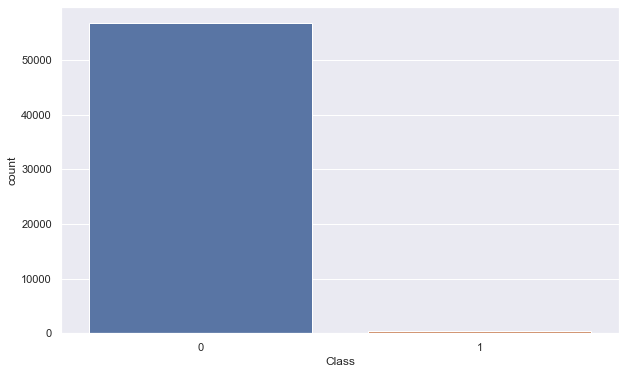

In [9]:
ax = sns.countplot(x=target_column_name, data=df)

In [11]:
percent_of_minority = 100* (len(Y_train[Y_train['Class'] == 1])/float(Y_train.shape[0]))
percent_of_majority = 100* (len(Y_train[Y_train['Class'] == 0])/float(Y_train.shape[0]))
print("minority percentage={:.02f}%; majority percentage={:.02f}%".format(percent_of_minority, percent_of_majority))

minority percentage=0.84%; majority percentage=99.16%


It is obvious that his data set is imbalanced. <b>The class of minority is less than 1% of the total data set! </b> (should be more sharp while this data set is the 20% sampling result of the original data set) <br/> <br/>
Let's see the distribution of classes in tSNE:

In [12]:
# This cell will take a long time...
from sklearn.manifold import TSNE

%time X_embedded = TSNE(n_components=2).fit_transform(X_train)

Wall time: 5min 34s


In [13]:
X_embedded.shape

(38427, 2)

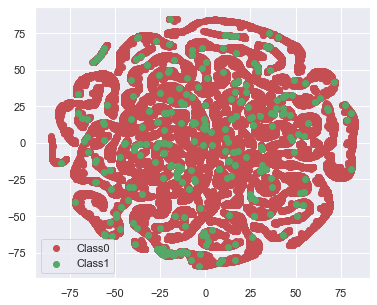

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
for i, c, label in zip([0, 1], colors, ["Class0", "Class1"]):
    plt.scatter(X_embedded[Y_train['Class'] == i, 0], X_embedded[Y_train['Class'] == i, 1], c=c, label=label)
    
plt.legend()
plt.show()

From the output of [**tSNE**](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (<font color='brown'>similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.</font>), it seems that the <b>data point of two classes are mingled together which implies we may need some feature engineering here</b>. 

Now let's check the performance of model with default hyper-parameters:

In [15]:
# Training
# clf = LogisticRegression().fit(X_train, Y_train)
clf, tt = train_with_time(LogisticRegression(), X_train, Y_train)

In [16]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [17]:
# Confusion table
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18732,43
1,28,125


We have 43 data point here as FN (actual class is 1 but predicted 0). Let's generate the report for common performance index:

In [18]:
model_name = 'lr_baseline'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.996248943364328
Precision =  0.8169934640522876
Recall =  0.7440476190476191
F1 Score =  0.778816199376947


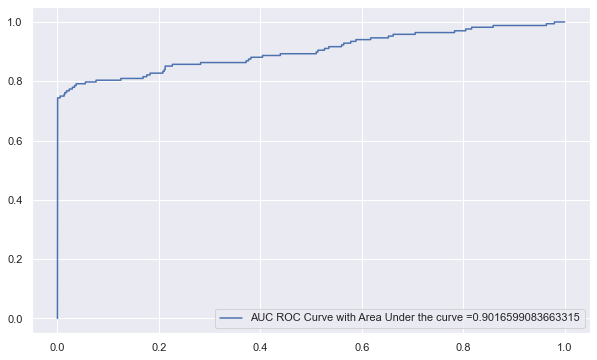

In [19]:
generate_auc_roc_curve(clf, X_test)

For more about ROC curve, please refer to this [post](http://mlwiki.org/index.php/ROC_Analysis). The Y axis is TPR (True Positive Rate) and X axis is FPR (False positive Rate)

### <font color=darkgreen>Undersampling</font>
The first weapon we are going to use is called "Undersampling" which is the reduce the size of majority class to be close to the size of minority class. First approach we are going to apply is [**ClusterCentroids**](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.ClusterCentroids.html):

In [47]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=rdm_state)
%time X_train_cc, Y_train_cc = cc.fit_sample(X_train, Y_train)

Wall time: 37.8 s


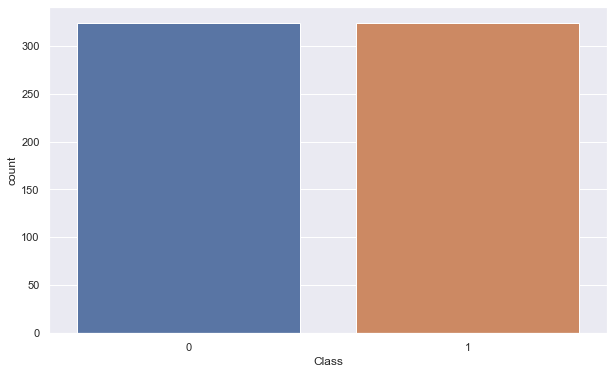

In [48]:
# The size of minority is 324. So we reduce the size of majority to 324 too
sns.countplot(Y_train_cc['Class'])

In [30]:
# Training
clf, tt = train_with_time(LogisticRegression(), X_train_cc, Y_train_cc)

In [31]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [32]:
# Confusion table
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,16477,12
1,2283,156


In [33]:
model_name = 'lr_us_cc'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.878751056635672
Precision =  0.06396063960639606
Recall =  0.9285714285714286
F1 Score =  0.1196777905638665


Our TP is improved from <font color='green'>125 to 156 (Recall 0.74->0.92)</font>; however, the FP is deteriorated <font color='red'>from 28 to **2283** (0.81->0.06)</font>! <br/><br/>

Let's try another method called [**Tomek**](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks) ([Illustration of the definition of a Tomek link](https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/under-sampling/plot_illustration_tomek_links.html?highlight=Tomek)):
![Tomek idea](images/10.PNG)

In [62]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='not minority')
tl.fit(X_train, Y_train)
%time X_train_tl, Y_train_tl = tl.fit_sample(X_train, Y_train)

Wall time: 961 ms


In [63]:
X_train_tl.shape

(38343, 30)

In [64]:
X_train.shape

(38427, 30)

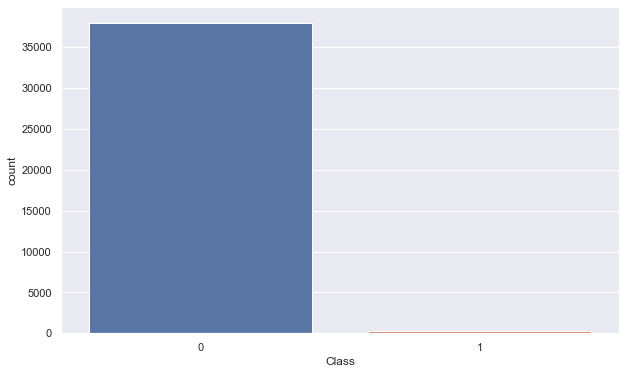

In [61]:
# The size of minority is 324. So we reduce the size of majority to 324 too
sns.countplot(Y_train_tl['Class'])

In [65]:
# Training
clf, tt = train_with_time(LogisticRegression(), X_train_tl, Y_train_tl)

In [66]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [67]:
# Confusion table
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18733,43
1,27,125


In [68]:
model_name = 'lr_us_tl'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.996301775147929
Precision =  0.8223684210526315
Recall =  0.7440476190476191
F1 Score =  0.78125


Our TP stay the same as 125; but, the FP is slightly improved <font color='green'>from 28 to 27</font>! <br/><br/>
There are more undersampling approaches supported by [imblean package](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.under_sampling) and you can try by yourself:
![other imbalanced approaches](images/11.PNG)
<br/>

### <font color='darkgreen'>class_weight='balanced'</font>
From the [lesson here](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s), we learned that some classifier(s) from <b>[scikit-learn](https://scikit-learn.org/stable/index.html)</b> support handling of imbalanced data. Take <b>[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn-linear-model-logisticregression)</b> for example, it support argument `class_weight`:
```
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
```
Now let's check what performance impact can `class_weight='balanced'` bring in:

Let's calculate the weight for each class based on the amount of data of each class:

In [70]:
out_dict = {}
for clz in unique_classes:
    out_dict[clz] = df.shape[0]/((df.loc[df[target_column_name] == clz].shape[0]) * len(unique_classes))

In [71]:
out_dict

{1: 58.28760162601626, 0: 0.5043261875032974}

<b>Because class 0 is a majority, so the weighting of it is smaller than the class 1.</b> Above is a example to calculate the weighting of class. Now let's train the classifier with `class_weight='balanced'`:

In [72]:
# clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)
clf, tt = train_with_time(LogisticRegression(class_weight='balanced'), X_train, Y_train)

In [73]:
from sklearn.utils import class_weight
# The weighting calculated by scikit-learn
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target_column_name])

array([ 0.50425163, 59.30092593])

Now let's check the performance:

In [74]:
Y_Test_Pred = clf.predict(X_test)
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18187,21
1,573,147


TP is improved from <font color='green'>125 to 147 (Recall 0.74->0.87)</font>; however, the FP is increased too <font color='red'>from 28 to **573** (Precision 0.81->0.20)</font>! <br/><br/>

In [75]:
model_name = 'lr_cw'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9686179205409975
Precision =  0.20416666666666666
Recall =  0.875
F1 Score =  0.3310810810810811


We can do one more step to find out the optimal weighting by [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [76]:
# The execution in this cell will take a long time
weights = np.linspace(0.01, 0.99, 50)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

%time grid_result, tt = train_with_time(gsc, X_train, Y_train)
print("Best parameters : %s" % gsc.best_params_)
optimal_class_weight = gsc.best_params_['class_weight']

Wall time: 2min 14s
Best parameters : {'class_weight': {0: 0.59, 1: 0.41000000000000003}}


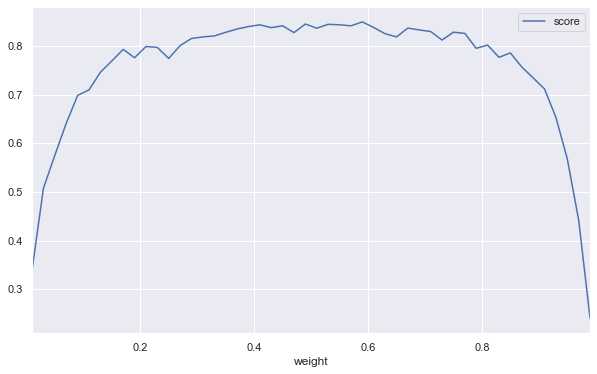

In [77]:
# How the score change over the weight setting increase
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'], 'weight': weights })
data_out.plot(x='weight')

It seems that the best setting of weight is between 0.4~0.6

In [82]:
# Top 10 best scores
data_out.sort_values('score', ascending=False)[:5]

,score,weight
29,0.849768,0.59
24,0.845432,0.49
26,0.844835,0.53
27,0.843862,0.55
20,0.843754,0.41


Then we use optimal `class_weight` to retrain the model:

In [79]:
clf, _ = train_with_time(LogisticRegression(class_weight=optimal_class_weight), X_train, Y_train)

In [80]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [81]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18744,43
1,16,125


Even the performance is better than the baseline by decreasing FP <font color='green'>from 28 to 16 (Precision 0.81->0.88)</font>, we have no gain over recall here.

In [83]:
model_name = 'lr_cw_grid'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9968829247675401
Precision =  0.8865248226950354
Recall =  0.7440476190476191
F1 Score =  0.8090614886731392


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

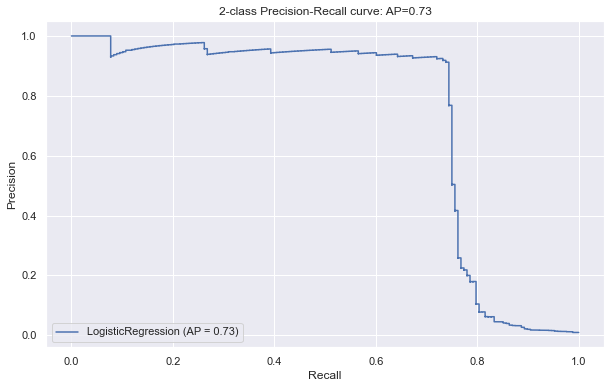

In [84]:
# PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

Y_score = clf.decision_function(X_test)
average_precision = average_precision_score(Y_test, Y_score)
disp = plot_precision_recall_curve(clf, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

For more about PR curve, please refer to this [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html). Normally, we use it to predict precision while given desire recall. (It is a trade-off to find the optimal model between recall and precision)

### <font color='darkgreen'>Oversampling - SMOTE</font>
[imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling) package support below Oversampling approaches:
![Oversampling approaches](images/12.PNG)
<br/>
So let's check our first oversampling trick [**SMOTE**](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) here:

In [86]:
sm = SMOTE(random_state=rdm_state, sampling_strategy = 1.0)
x_train_smote, y_train_smote = sm.fit_sample(X_train, Y_train)

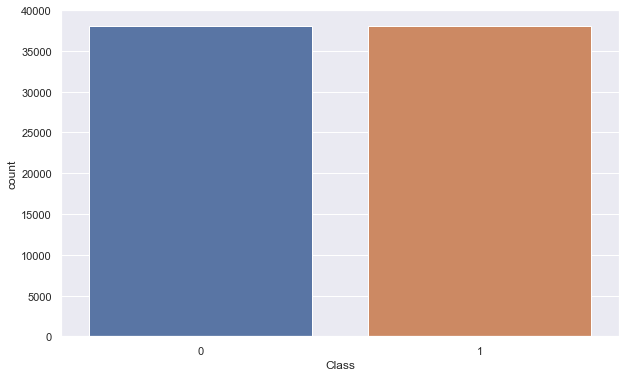

In [87]:
# The size of minority is 324. So we reduce the size of majority to 324 too
sns.countplot(y_train_smote['Class'])

The oversampling SMOTE will **generate new data point as minority class** and bring size of minority class to be close to be size of majority class. Now let's use the balanced data to train the model:

In [89]:
pipe = make_pipeline(
    SMOTE(random_state=rdm_state, sampling_strategy = 1.0),
    LogisticRegression()
)
%time clf, tt = train_with_time(pipe, X_train, Y_train)

Wall time: 556 ms


In [90]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [91]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18234,30
1,526,138


TP is improved from <font color='green'>125 to 138 (Recall 0.74->0.82)</font>; FP get worsened too <font color='red'>from 28 to **526** (Precision 0.81->0.20)</font>! <br/><br/>

In [93]:
model_name = 'lr_smote'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.970625528317836
Precision =  0.20783132530120482
Recall =  0.8214285714285714
F1 Score =  0.3317307692307693


Now let's make it more advanced by applying both [**SMOTE**](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) and `class_weight` setting (below code will take some time to complete):

In [99]:
pipe = make_pipeline(
    SMOTE(random_state=rdm_state, sampling_strategy = 1.0),
    LogisticRegression()
)

weights = np.linspace(0.001, 0.4, 60)

gsc = GridSearchCV(
    estimator=pipe, 
    param_grid={'logisticregression__class_weight': [{0: x, 1: 1.0-x} for x in weights]}, 
    scoring='f1', 
    cv=5
)
%time grid_result, tt = train_with_time(gsc, X_train, Y_train)

Wall time: 4min 47s


Let's check the performance:

Best parameters : {'logisticregression__class_weight': {0: 0.3932372881355932, 1: 0.6067627118644068}}


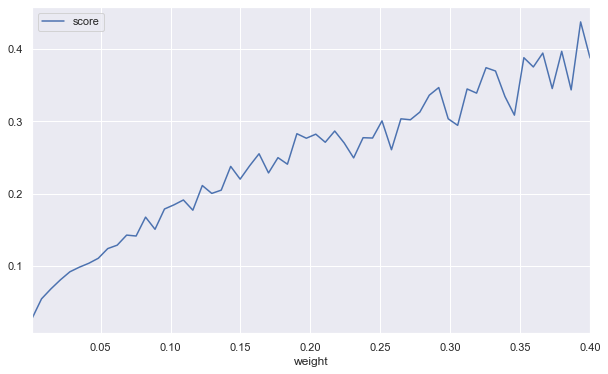

In [101]:
print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'], 'weight': weights })
weight_f1_score_df.plot(x='weight')
optimal_clz_weight_with_smote = list(grid_result.best_params_.values())[0]

In [103]:
# Let's apply the optimal setting sampling_strategy
'''
pipe = make_pipeline(
    SMOTE(random_state=rdm_state, sampling_strategy = 1.0),
    LogisticRegression(class_weight=optimal_clz_weight_with_smote)
)

pipe.fit(X_train, Y_train)
'''

Y_Test_Pred = grid_result.predict(X_test)

In [104]:
# Confusion matrix

pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18308,21
1,452,147


The performance looks quite good. We slightly increase the FP (False Positive) from <font color='red'>31 -> 44</font> and improve the TP (True Positive) from <font color='green'>121 -> 124</font> as well. Let's check more performance index:

More performance index:

In [105]:
model_name = 'lr_smote_with_cw_grid'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9750105663567202
Precision =  0.24540901502504173
Recall =  0.875
F1 Score =  0.38331160365058675


Let's see other techniques supported in imblean:

In [62]:
# Check https://www.youtube.com/watch?v=g6F_zNcULKE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=12&t=2785s
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SVMSMOTE

# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SVMSMOTE.html
svm_sm = SVMSMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = svm_sm.fit_sample(X_train, Y_train)

In [63]:
pipe = make_pipeline(
    SVMSMOTE(random_state=rdm_state, sampling_strategy = 1.0),
    LogisticRegression()
)

%time clf, tt = train_with_time(pipe, X_train, Y_train)

Wall time: 2.65 s


In [64]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [65]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18650,32
1,110,136


In [66]:
model_name = 'lr_svmsmote'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9924978867286559
Precision =  0.5528455284552846
Recall =  0.8095238095238095
F1 Score =  0.6570048309178743


In [67]:
# Grid search for combination of hyperparamters which will take a long time
# Skip this one which take a long time
pipe = make_pipeline(
    SVMSMOTE(),
    LogisticRegression()
)

ss_weights = np.linspace(0.01, 0.4, 20)
lr_weights = np.linspace(0.01, 0.5, 10)

# 'class_weight': [{0: x, 1: 1.0-x} for x in weights]
gsc = GridSearchCV(estimator=pipe, param_grid={
    'svmsmote__sampling_strategy': ss_weights, 
    'logisticregression__class_weight': [{0: x, 1: 1.0-x} for x in lr_weights]}, scoring='f1', cv=5, n_jobs=8)
%time grid_result, tt = train_with_time(gsc, X_train, Y_train)

Wall time: 10min 48s


In [68]:
print("Best parameters : %s" % grid_result.best_params_)
# weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
#                                    'weight': ss_weights })
# weight_f1_score_df.plot(x='weight')
best_svmsmote_sampling_strategy = grid_result.best_params_['svmsmote__sampling_strategy']
best_class_weight = grid_result.best_params_['logisticregression__class_weight']

Best parameters : {'logisticregression__class_weight': {0: 0.6766666666666666, 1: 0.32333333333333336}, 'svmsmote__sampling_strategy': 0.05105263157894737}


In [69]:
# Let's apply the optimal setting sampling_strategy
pipe = make_pipeline(
    SVMSMOTE(sampling_strategy=best_svmsmote_sampling_strategy),
    LogisticRegression(class_weight=best_class_weight)
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [70]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18727,43
1,33,125


In [71]:
model_name = 'lr_svmsmote_cx'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9959847844463229
Precision =  0.7911392405063291
Recall =  0.7440476190476191
F1 Score =  0.7668711656441718


Let's use other ML model SVM to see how it performs:

In [119]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%time clf, tt = train_with_time(make_pipeline(StandardScaler(), SVC(gamma='scale', kernel='linear', cache_size=300)), X_train, Y_train)

Wall time: 58.1 s


In [120]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [121]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18752,41
1,8,127


In [122]:
model_name = 'svm'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9974112426035503
Precision =  0.9407407407407408
Recall =  0.7559523809523809
F1 Score =  0.8382838283828383


Do grid search on parameter `class_weight`:

In [76]:
cz_weights = np.linspace(0.05, 0.99, 20)
c_values = np.linspace(0.1, 1, 10)
# 'class_weight': [{0: x, 1: 1.0-x} for x in weights]
gsc = GridSearchCV(
    estimator=clf,
    param_grid={
        'svc__class_weight': [{0: x, 1: 1.0-x} for x in cz_weights],
        'svc__kernel': ["linear", "poly", "rbf", "sigmoid", "precomputed"],
        # 'svc_gamma': ['auto', 'scale']
        #'svc__C': c_values
    },
    scoring='f1',
    cv=10
)
%time grid_result, tt = train_with_time(gsc, X_train, Y_train)

Wall time: 1h 3min 57s


Best parameters : {'svc__class_weight': {0: 0.14894736842105263, 1: 0.8510526315789474}, 'svc__kernel': 'linear'}




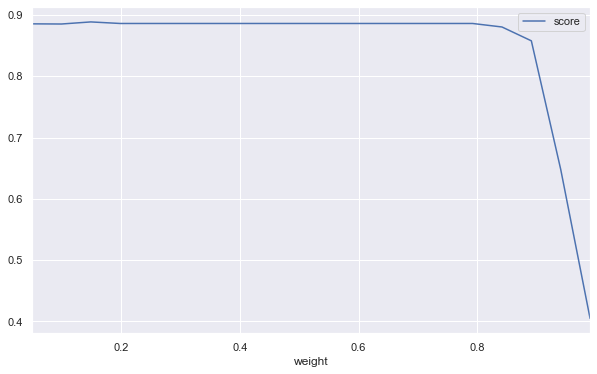

In [106]:
print("Best parameters : %s\n\n" % grid_result.best_params_)
linear_score = grid_result.cv_results_['mean_test_score'][0::5]

weight_f1_score_df = pd.DataFrame({ 'score': linear_score, 'weight': cz_weights })
weight_f1_score_df.plot(x='weight')

best_clz_weight = grid_result.best_params_['svc__class_weight']
best_kernel_type = grid_result.best_params_['svc__kernel']

In [124]:
# Let's apply the optimal setting sampling_strategy
# pipe = make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight=best_clz_weight, kernel=best_kernel_type)).fit(X_train, Y_train)

# gsc.fit(X_train, Y_train)

Y_Test_Pred = gsc.predict(X_test)

In [125]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18752,41
1,8,127


In [126]:
model_name = 'svm_grid'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9974112426035503
Precision =  0.9407407407407408
Recall =  0.7559523809523809
F1 Score =  0.8382838283828383


What if we apply SMOTE here too:

In [85]:
# Let's apply the optimal setting sampling_strategy
pipe = make_pipeline(
    SVMSMOTE(random_state=rdm_state, sampling_strategy=best_svmsmote_sampling_strategy),
    StandardScaler(), 
    SVC(gamma='auto', kernel=best_kernel_type, class_weight=best_clz_weight)
).fit(X_train, Y_train)

%time clf, tt = train_with_time(pipe, X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

Wall time: 4.55 s


In [86]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,18751,37
1,9,131


The performance is so far the best. We reduce the FP (False Positive) from <font color='green'>31 -> 3</font>, FN (False Negative) from <font color='green'>42->37</font> and improve the TP (True Positive) from <font color='green'>121 -> 126</font> as well. Let's check more performance index:

In [87]:
model_name = 'svm_cx'
perf_store[model_name] = generate_model_report(Y_test, Y_Test_Pred)
time_cost_store[model_name] = tt

Accuracy =  0.9975697379543533
Precision =  0.9357142857142857
Recall =  0.7797619047619048
F1 Score =  0.8506493506493507


### <font color='darkgreen'>Evaluation of all techniques</font>
Let's check how those techniques perform:

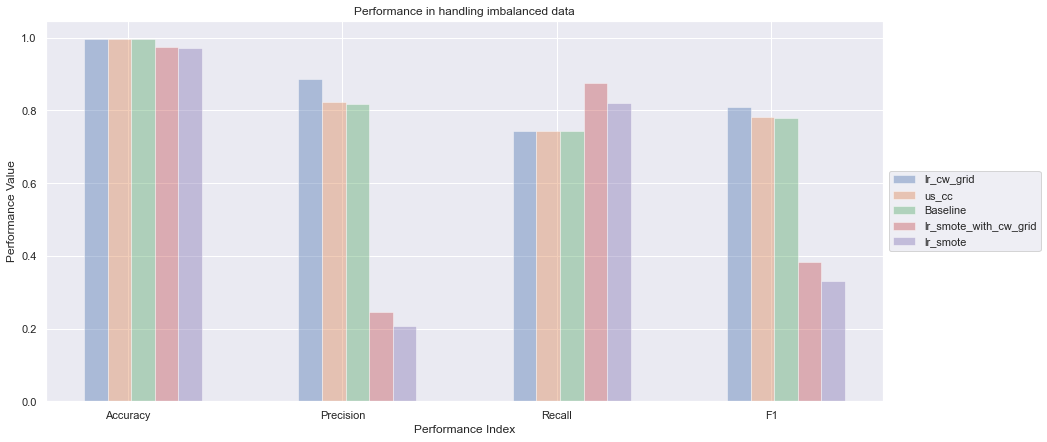

In [106]:
import matplotlib.pyplot as plt

top_n = 5
plt.figure(figsize=(15, 7))
bar_width = 0.11
tech_names = []
perf_datas_sorted = sorted(perf_store.items(), key=lambda t: t[1][3], reverse=True)[:top_n]
for i, (tech_name, datas) in enumerate(perf_datas_sorted):
    # print("Handle tech={}: datas".format(tech_name, datas))
    index = np.arange(len(datas))
    plt.bar(index + i*bar_width,
            datas, 
            bar_width,
            alpha=.4,
            label=tech_name) 
    
    tech_names.append(tech_name)
    
plt.ylabel("Performance Value")
plt.xlabel("Performance Index")
plt.title("Performance in handling imbalanced data")
plt.xticks(index+.3 / 2 , ["Accuracy", "Precision", "Recall", "F1"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.show()

In order to obtain best performance, we have to conduct many experiment to find the best technique for our imbalanced dataset.

Also we might be interested in the time in conducting training: TBD

In [89]:
sorted(time_cost_store.items(), key=lambda t: t[1])

[('lr_cw', 0.384743),
 ('Baseline', 0.402657),
 ('lr_smote', 0.887105),
 ('lr_svmsmote', 2.588278),
 ('svm', 3.333931),
 ('svm_cx', 8.253519),
 ('lr_cw_grid', 67.733112),
 ('lr_smote_grid', 115.791171),
 ('lr_svmsmote_cx', 317.388359),
 ('svm_grid', 922.136735)]

## <font color='darkblue'>Supplement</font>
* [Machine LearningTutorial | Resampling 2: Cluster Centroids and Tomek Links | Rohit Ghosh | GreyAtom](https://www.youtube.com/watch?v=odXE7WiO2GM)
* [Predicting Fraud with TensorFlow: Feature engineering](https://www.kaggle.com/vishal1508/predicting-fraud-with-tensorflow-a03968)
* [Natalie Hockham: Machine learning with imbalanced data sets](https://www.youtube.com/watch?v=X9MZtvvQDR4&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=63)
* [SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets](https://www.youtube.com/watch?v=U3X98xZ4_no&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=62)
* [Confusion Matrix in Machine Learning](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)
* [Aditya Lahiri: Dealing With Imbalanced Classes in Machine Learning | PyData New York 2019](https://www.youtube.com/watch?v=6M2d2n-QXCc&t=782s)
* [Class Weights for Handling Imbalanced Datasets](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s)
* [SMOTE - Synthetic Minority Oversampling Technique](https://www.youtube.com/watch?v=FheTDyCwRdE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=4)
* [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [CellStrat - Classification of Imbalanced data](https://www.youtube.com/watch?v=g6F_zNcULKE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=12&t=2785s)
* [Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
* [tSNE to visualize digits](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html)
* [Day20 - Matplotlib資料視覺化進階！](https://ithelp.ithome.com.tw/articles/10196410)
* [FAQ - How to put the legend out of the plot](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)